## Informasi Mahasiswa

Nama: Ivan Chiari

NPM : 2108107010027

## Jenis Dataset
<p>Konteks:</p>
<p>Ini adalah Kumpulan Data yang diunduh dari Repositori Pembelajaran Mesin UCI.<p>
<p>Deskripsi sesuai situs UCI : Kumpulan data historis pasar penilaian real estat dikumpulkan dari Sindian Dist., New Taipei City, Taiwan.<p>

Informasi Atribut:
The inputs are as follows
* X1 the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
* X2 the house age (unit: year)
* X3 the distance to the nearest MRT station (unit: meter)
* X4 the number of convenience stores in the living circle on foot (integer)
* X5 the geographic coordinate, latitude. (unit: degree)
* X6 the geographic coordinate, longitude. (unit: degree)

The output is as follow
* Y house price of unit area (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared)

## Import Libary dan Baca dataset

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

In [2]:
# Baca dataset
house_df = pd.read_excel("dataset/UCI_Real_Estate_Valuation.xlsx")
house_df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


## Preprocessing Data

In [3]:
# informasi umum kolom pada dataset
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [4]:
# Remane kolom pada dataset agar lebih mudah dipahami
house_df.rename(
    columns={
        "X1 transaction date": "Transaction_Date", 
        "X2 house age": "House_Age", 
        "X3 distance to the nearest MRT station": "Distance",
        "X4 number of convenience stores": "Num_of_Store",
        "X5 latitude": "Latitude",
        "X6 longitude": "Longitude",
        "Y house price of unit area": "Target",
    },
    inplace = True
)

In [5]:
# informasi statistik dari dataset
house_df.describe().T

,count,mean,std,min,25%,50%,75%,max
No,414.0,207.500000,119.655756,1.000000,104.250000,207.500000,310.750000,414.000000
Transaction_Date,414.0,2013.148953,0.281995,2012.666667,2012.916667,2013.166667,2013.416667,2013.583333
House_Age,414.0,17.712560,11.392485,0.000000,9.025000,16.100000,28.150000,43.800000
Distance,414.0,1083.885689,1262.109595,23.382840,289.324800,492.231300,1454.279000,6488.021000
Num_of_Store,414.0,4.094203,2.945562,0.000000,1.000000,4.000000,6.000000,10.000000
Latitude,414.0,24.969030,0.012410,24.932070,24.963000,24.971100,24.977455,25.014590
Longitude,414.0,121.533361,0.015347,121.473530,121.528085,121.538630,121.543305,121.566270
Target,414.0,37.980193,13.606488,7.600000,27.700000,38.450000,46.600000,117.500000


In [6]:
# cek apakah ada missing value pada dataset
house_df.isnull().sum()

No                  0
Transaction_Date    0
House_Age           0
Distance            0
Num_of_Store        0
Latitude            0
Longitude           0
Target              0
dtype: int64

In [7]:
# cek apakah ada duplikat data pada dataset
house_df.duplicated().sum()

0

In [8]:
# drop kolom No dan Transaction_Date karena tidak terlalu penting pada analisis
house_df.drop(['No','Transaction_Date'], axis=1, inplace=True)

In [9]:
# dataset setelah di drop kolom No dan Transaction_Date
house_df.head(5)

,House_Age,Distance,Num_of_Store,Latitude,Longitude,Target
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


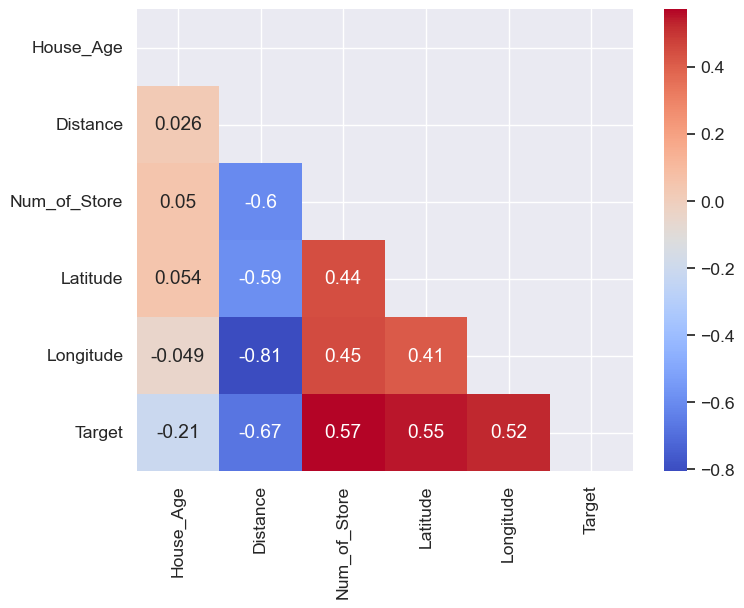

In [10]:
# korelasi antar kolom pada dataset
sns.set(font_scale=1.15)
plt.figure(figsize=(8, 6))
crr = house_df.corr()
mask = np.zeros_like(crr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(crr, annot = True, linecolor = "black",cmap='coolwarm', mask=mask ,cbar=True)
plt.show()

kolom house age dan distance memiliki korelasi negatif yang cukup kuat. sedangkan num of store memiliki korelasi positif yang cukup kuat

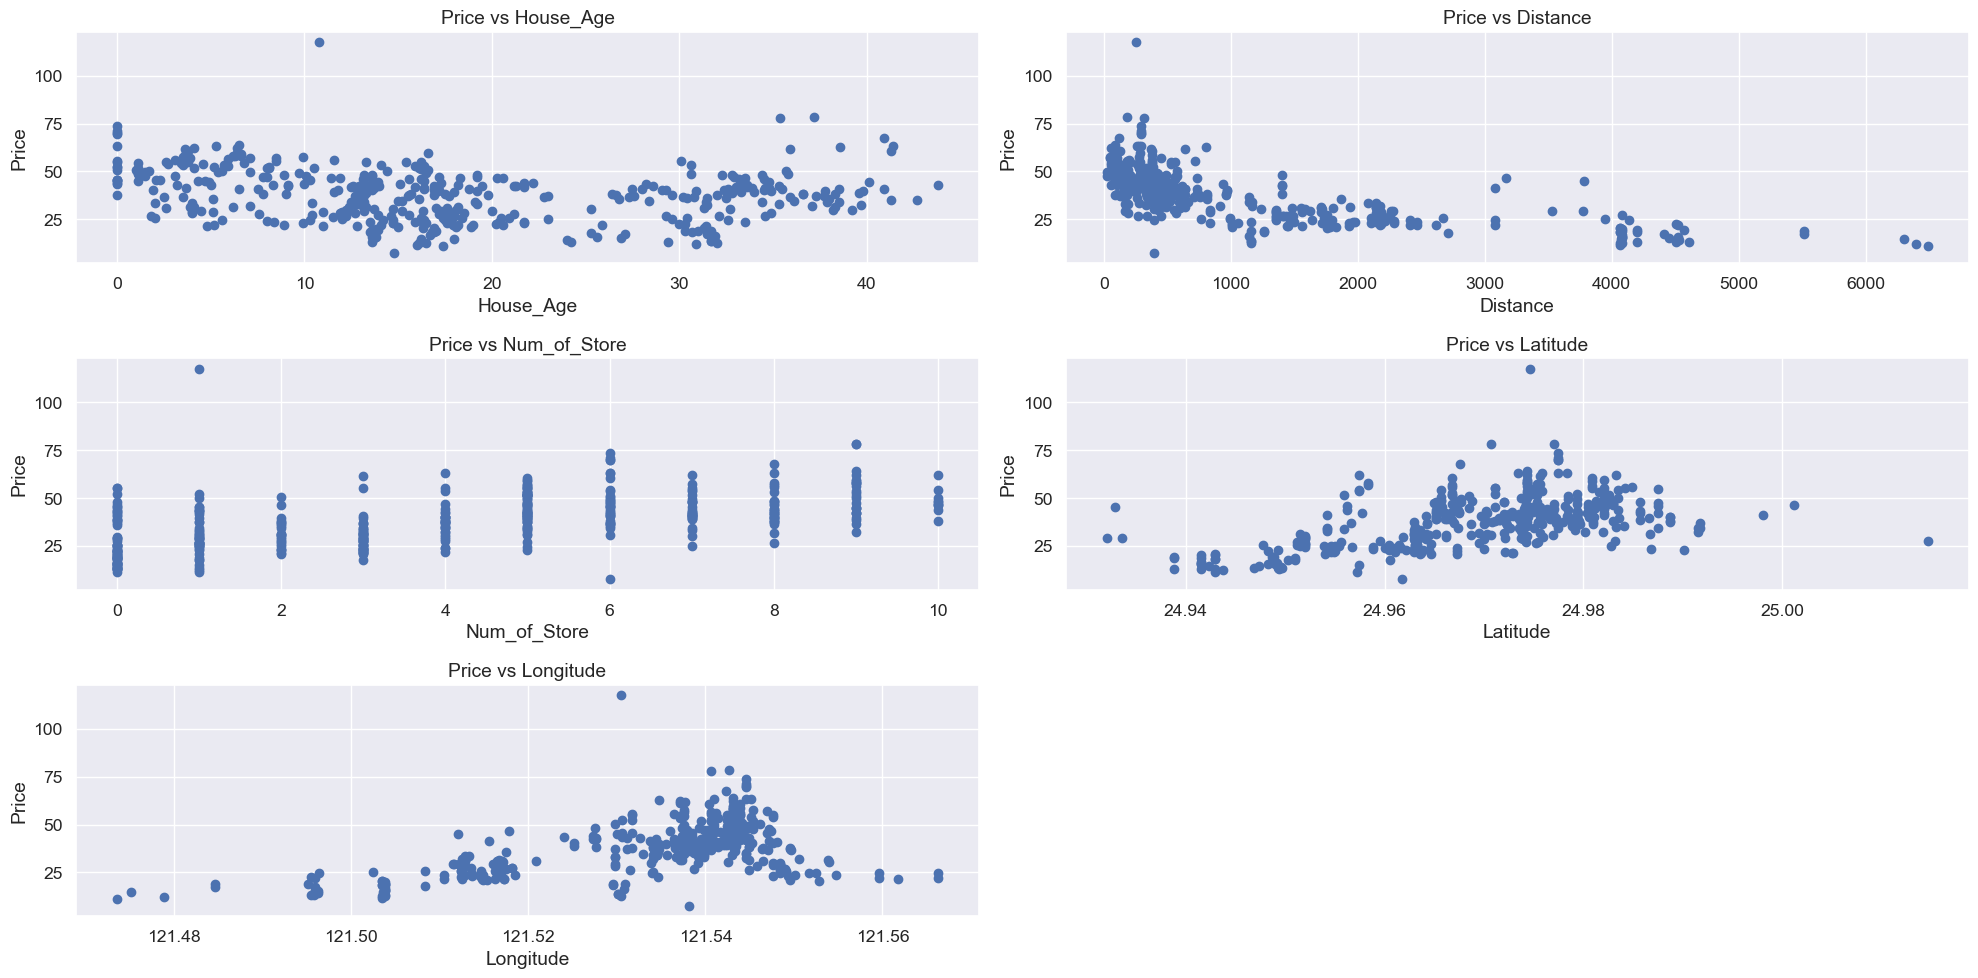

In [11]:
# plot price vs other features
plt.figure(figsize=(20,10))
features = ['House_Age', 'Distance', 'Num_of_Store', 'Latitude', 'Longitude']
for i in range(5):
    plt.subplot(3, 2, i+1)
    plt.scatter(house_df[features[i]], house_df['Target'])
    plt.title('Price vs ' + features[i])
    plt.xlabel(features[i])
    plt.ylabel('Price')
    plt.grid(True)
    
plt.tight_layout()
plt.show()

Dapat dilihat pada plot diatas bahwa price memiliki korelasi yang cukup kuat dengan Distance secara negatif yang berarti semakin jauh jarak ke stasiun MRT maka harga akan semakin murah

In [12]:
# drop kolom Latitude dan Longitude karena tidak terlalu penting pada analisis
house_df.drop(['Latitude', 'Longitude'], axis=1, inplace=True)

## Split dataset dan normalisasi data

In [13]:
# Initialise the Scaler
scaler = StandardScaler()

# Tentukan variabel independen dan dependen
X = house_df.drop('Target', axis=1)
y = house_df['Target']

# Scaling the independent variable
X_scaled = scaler.fit_transform(X)

# Scaling the dependent variable
y_scaler = StandardScaler()
y_scaled = y_scaler.fit_transform(y.values.reshape(-1,1)).flatten()

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)


## Membangun Model 

In [14]:
# make custom callback function
class HousePriceCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        mse = logs.get('mean_squared_error')
        if mse is not None and mse < 1000: 
            print("\nMean Squared Error is less than 1000!")
            self.model.stop_training = True
            
callbacks = HousePriceCallback()

In [15]:
# Inisialisasi model ann regresi prediksi harga rumah
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

optimizer = tf.keras.optimizers.Adam(0.001)

model.compile(optimizer=optimizer, loss='mean_squared_error')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               512       
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 10881 (42.50 KB)
Trainable params: 10881 (42.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
# Training model
training = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[callbacks])
# validasi model dengan data test set

Epoch 1/100
11/11 [==============================] - 1s 15ms/step - loss: 0.8281 - val_loss: 0.4894
Epoch 2/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5125 - val_loss: 0.2975
Epoch 3/100
11/11 [==============================] - 0s 4ms/step - loss: 0.4741 - val_loss: 0.2810
Epoch 4/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4457 - val_loss: 0.2759
Epoch 5/100
11/11 [==============================] - 0s 4ms/step - loss: 0.4348 - val_loss: 0.2687
Epoch 6/100
11/11 [==============================] - 0s 4ms/step - loss: 0.4261 - val_loss: 0.2617
Epoch 7/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4253 - val_loss: 0.2557
Epoch 8/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4224 - val_loss: 0.2585
Epoch 9/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4194 - val_loss: 0.2512
Epoch 10/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4136 - val_loss: 0.2541
Epoch 11

In [17]:
# Evaluasi model
loss = model.evaluate(X_test, y_test)
print("Loss: ", loss)


3/3 [==============================] - 0s 2ms/step - loss: 0.2504
Loss:  0.25035950541496277


Text(0.5, 1.0, 'Loss vs Val_Loss')

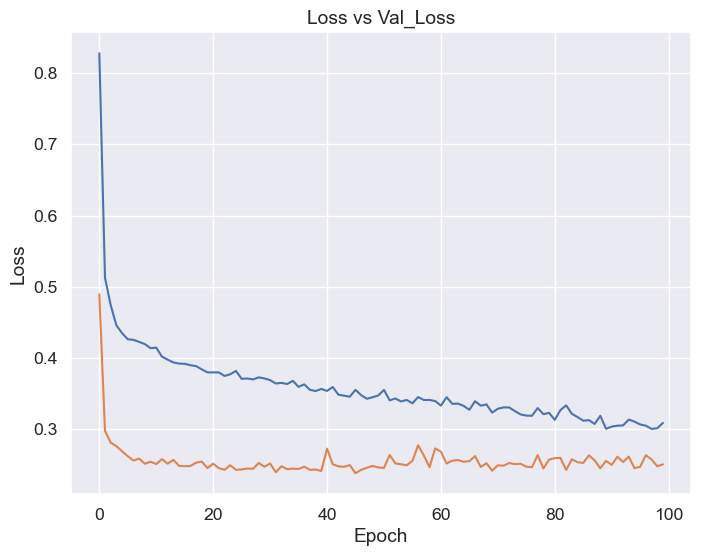

In [18]:
# plot loss dan val_loss
plt.figure(figsize=(8,6))
plt.plot(training.history['loss'], label='Loss') # loss is the loss on the training set
plt.plot(training.history['val_loss'], label='Val_Loss') # val loss is the loss on the validation set
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Val_Loss')

In [19]:
# Generate random new data with three features: house age, distance to nearest MRT station, and number of convenience stores
num_samples = 5  # Number of samples
house_age = np.random.randint(1, 30, num_samples)  # Random house age between 1 and 30 years
distance_to_mrt = np.random.uniform(100, 2000, num_samples)  # Random distance between 100 and 2000 meters
num_convenience_stores = np.random.randint(1, 20, num_samples)  # Random number of convenience stores between 1 and 20

# Create new_data array with shape (num_samples, num_features)
new_data = np.column_stack((house_age, distance_to_mrt, num_convenience_stores))

# Print the generated new data
print("New Data:")
print(new_data)


New Data:
[[  22.          121.35139786    6.        ]
 [   8.          480.33861995    2.        ]
 [  29.          869.44494903   15.        ]
 [  28.         1748.84328872   13.        ]
 [  10.          614.65914519    7.        ]]


In [20]:
# test model with new data
new_data_scaled = scaler.fit_transform(new_data) # Scale the new data
prediction = model.predict(new_data_scaled) # Predict the price
print("Prediction: ", prediction) # Print the predicted price

# Inverse transform the scaled predictions
predictions_unscaled = y_scaler.inverse_transform(prediction)

# Print the unscaled predictions
print("Unscaled Predictions: ", predictions_unscaled)



1/1 [==============================] - 0s 72ms/step
Prediction:  [[ 1.5686623 ]
 [ 0.95969194]
 [-0.6272763 ]
 [-1.1544319 ]
 [ 0.11137296]]
Unscaled Predictions:  [[59.298386]
 [51.02245 ]
 [29.45548 ]
 [22.291412]
 [39.493755]]
